### CART和决策树的超参数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
 import sklearn.datasets as datasets
# 生成虚拟数据，不是线性的
X,y = datasets.make_moons(noise=0.25,random_state=666)

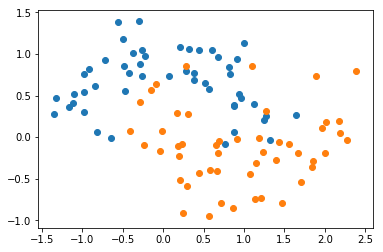

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier
df_clf = DecisionTreeClassifier()
df_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
def plot_decision_boundary(model,axis):
    #model 是我们的模型    axis  是我们的坐标范围
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

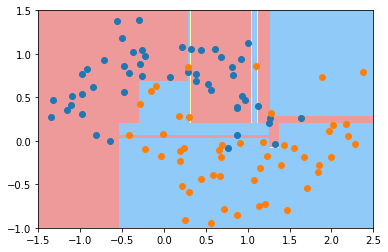

In [8]:
plot_decision_boundary(df_clf,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()    # 显然这个数据已经过拟合了

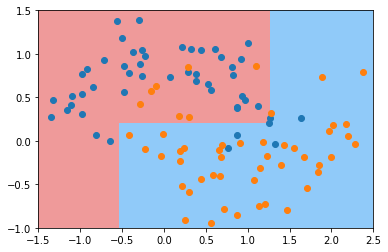

In [11]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)  # 最大深度为2
dt_clf2.fit(X,y)
plot_decision_boundary(dt_clf2,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

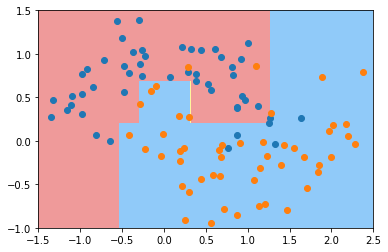

In [56]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)  # 对于一个节点至少要有多少个数据才对她进行拆分
dt_clf3.fit(X,y)
plot_decision_boundary(dt_clf3,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
# 这个参数如果设置的过高就会出现欠拟合的情况  过低就会出现过拟合的现象 

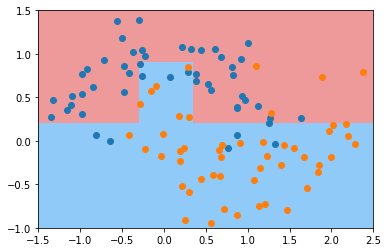

In [32]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)  # 对于一个叶子节点来说至少要有几个样本
dt_clf4.fit(X,y)
plot_decision_boundary(dt_clf4,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
# 这个参数 是限制叶子节点的数据上的数量  如果数量过小，那么就会对少量的数据敏感，造成过拟合的情况

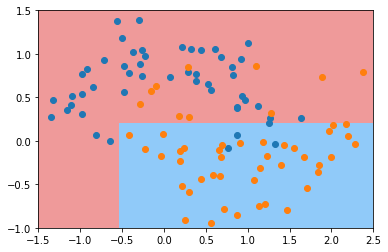

In [37]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=3)  # 最多有多少个叶子节点
dt_clf5.fit(X,y)
plot_decision_boundary(dt_clf5,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
# 叶子节点越多我们的决策树整体就越复杂，就越有可能产生过拟合的情况

In [ ]:
# 我们可以使用网格搜索的方式找出最适合的参数。

In [105]:
# 将我们想要传的数据填入param_grid中
param_grid =[
    {
#         'min_samples_split':[i for i in range(1,10,1)],
       # 'max_leaf_nodes':[i for i in range(1,10)],
        'max_depth':[i for i in  range(1,5)],
        
        'random_state':range(0,10,1),
        'min_samples_leaf':range(1,10,1)
    }
]

In [106]:
from sklearn.model_selection import  GridSearchCV
dt_cltCV = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_cltCV,param_grid,n_jobs=4)



In [107]:
grid_search

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'random_state': range(0, 10), 'max_depth': [1, 2, 3, 4], 'min_samples_leaf': range(1, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
#返回最佳分类器
grid_search.estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
grid_search.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'random_state': range(0, 10), 'max_depth': [1, 2, 3, 4], 'min_samples_leaf': range(1, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

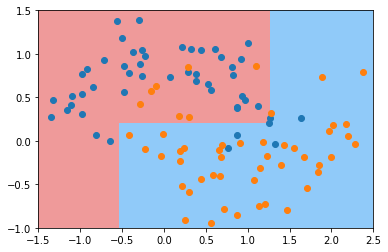

In [110]:
plot_decision_boundary(grid_search,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()